In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df_sheet1=pd.read_excel(r"V:\Downloads\Supermart Case Data.xlsx",sheet_name='Data 1')
df_sheet2=pd.read_excel(r"V:\Downloads\Supermart Case Data.xlsx",sheet_name='Data 2')
df_sheet3=pd.read_excel(r"V:\Downloads\Supermart Case Data.xlsx",sheet_name='Data 3')

In [114]:
df_sheet1.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price (INR),Quantity,Date,Time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00


In [115]:
df_sheet2.head()

,Invoice ID,Cost of Goods Sold (INR)
0,101-17-6199,304.5035
1,101-81-4070,119.3580
2,102-06-2002,107.3125
3,102-77-2261,411.4530
4,105-10-6182,40.8120


In [116]:
df_sheet3.head()

,Branch,City,Customer Type,Gender,Product Line,Date,Time,Payment Type
0,C,Naypyitaw,Member,Female,Food and beverages,2019-03-09,11:23:00,Cash
1,A,Yangon,Member,Male,Health and beauty,2019-03-09,18:24:00,Ewallet
2,A,Yangon,Normal,Male,Sports and travel,2019-01-19,14:08:00,Credit card
3,B,Mandalay,Member,Female,Sports and travel,2019-03-11,15:53:00,Cash
4,A,Yangon,Member,Female,Fashion accessories,2019-01-14,12:52:00,Ewallet


In [117]:
df_profit_calc=pd.merge(df_sheet1,df_sheet2,on='Invoice ID')

In [118]:
df_profit_calc['Profit']=(df_profit_calc['Unit Price (INR)']*df_profit_calc['Quantity'])-df_profit_calc['Cost of Goods Sold (INR)']

In [119]:
df_profit_calc['Profit Margin']=df_profit_calc['Profit']*100/(df_profit_calc['Unit Price (INR)']*df_profit_calc['Quantity'])

In [120]:
df_profit_calc.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price (INR),Quantity,Date,Time,Cost of Goods Sold (INR),Profit,Profit Margin
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,444.4055,78.4245,15.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,68.7600,7.6400,10.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,259.4480,64.8620,20.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,419.1840,46.5760,10.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,513.5445,90.6255,15.0


In [121]:
df_profit_calc.drop(['Unit Price (INR)','Quantity','Cost of Goods Sold (INR)','Date','Time','Gender','Customer Type','City','Invoice ID','Profit'],axis=1,inplace=True)

In [122]:
df_profit_calc.head()

,Branch,Product Line,Profit Margin
0,A,Health and beauty,15.0
1,C,Electronic accessories,10.0
2,A,Home and lifestyle,20.0
3,A,Health and beauty,10.0
4,A,Sports and travel,15.0


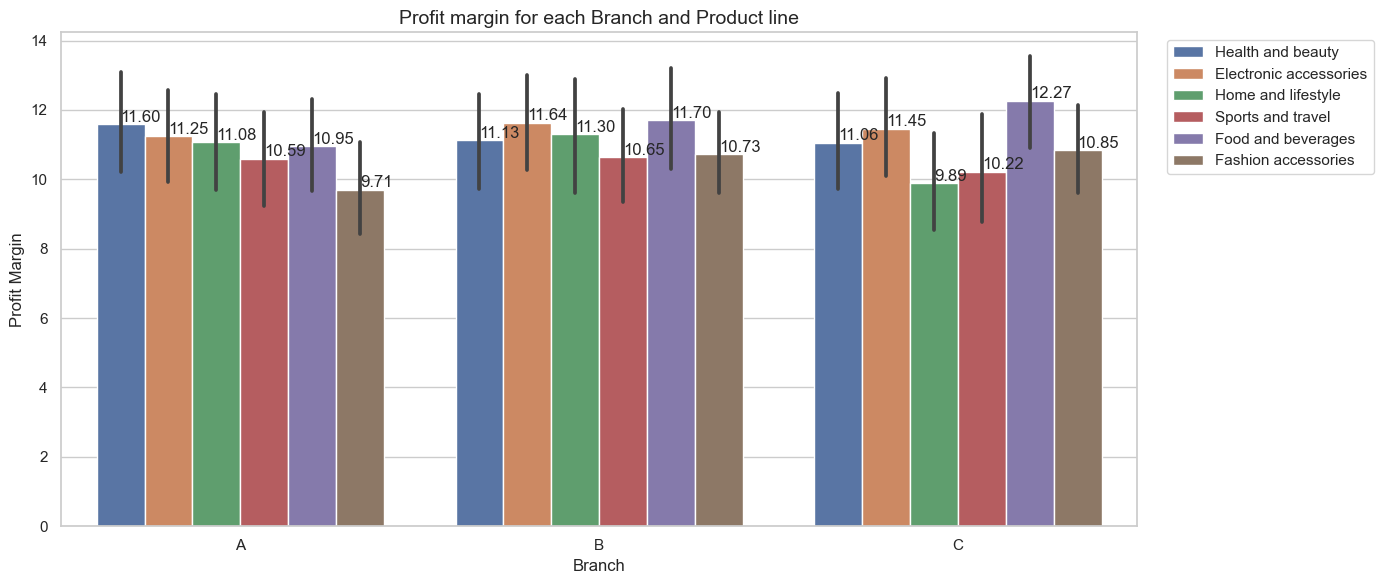

In [127]:
df_profit_calc['Branch'] = pd.Categorical(df_profit_calc['Branch'], categories=sorted(df_profit_calc['Branch'].unique()), ordered=True)
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
ax = sns.barplot(x='Branch', y='Profit Margin', hue='Product Line', data=df_profit_calc)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='left', va='center',
                xytext=(0, 5), textcoords='offset points')
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit margin for each Branch and Product line', fontsize=14)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [124]:
df_profit_calc_grouped=df_profit_calc.groupby(['Branch','Product Line']).agg({'Profit Margin':'mean'}).reset_index()

In [128]:
df_profit_calc_grouped

,Branch,Product Line,Profit Margin
0,A,Electronic accessories,11.250000
1,A,Fashion accessories,9.705882
2,A,Food and beverages,10.948276
3,A,Health and beauty,11.595745
4,A,Home and lifestyle,11.076923
5,A,Sports and travel,10.593220
6,B,Electronic accessories,11.636364
7,B,Fashion accessories,10.725806
8,B,Food and beverages,11.700000
9,B,Health and beauty,11.132075


In [129]:
df_sheet1['Total Payment (INR)']=(df_sheet1['Unit Price (INR)']*df_sheet1['Quantity'])

In [135]:
df_payment_type=pd.merge(df_sheet1,df_sheet3,on=['Branch','City','Customer Type','Gender','Product Line','Date','Time'])

In [136]:
df_payment_type.head()

,Invoice ID,Branch,City,Customer Type,Gender,Product Line,Unit Price (INR),Quantity,Date,Time,Total Payment (INR),Payment Type
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,13:08:00,522.83,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,10:29:00,76.40,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,13:23:00,324.31,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,20:33:00,465.76,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,10:37:00,604.17,Ewallet


In [137]:
df_payment_type.drop(['Invoice ID','Branch','City','Gender','Product Line','Unit Price (INR)','Quantity','Date','Time'],axis=1,inplace=True)

In [138]:
df_payment_type.head()

,Customer Type,Total Payment (INR),Payment Type
0,Member,522.83,Ewallet
1,Normal,76.40,Cash
2,Normal,324.31,Credit card
3,Member,465.76,Ewallet
4,Normal,604.17,Ewallet


In [144]:
df_total_payment = df_payment_type.groupby(['Customer Type', 'Payment Type'])['Total Payment (INR)'].sum().reset_index()

In [146]:
df_total_payment

,Customer Type,Payment Type,Total Payment (INR)
0,Member,Cash,52058.11
1,Member,Credit card,55020.45
2,Member,Ewallet,49324.72
3,Normal,Cash,54805.29
4,Normal,Credit card,40948.19
5,Normal,Ewallet,55430.62


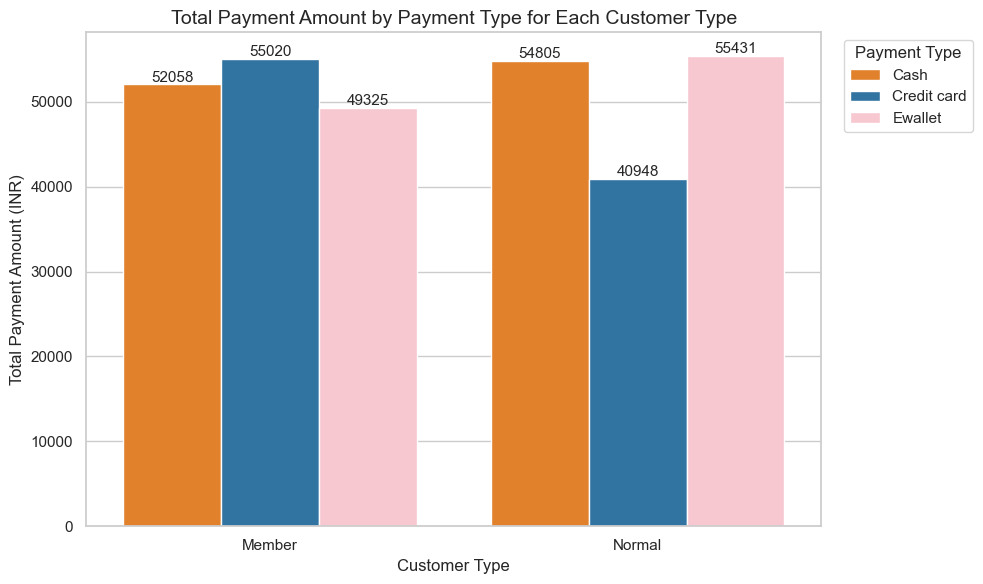

In [143]:
# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Create the grouped bar plot with custom color palette
colors = ['#FF7F0E', '#1F77B4', '#FFC0CB']
sns.barplot(x='Customer Type', y='Total Payment (INR)', hue='Payment Type', data=df_total_payment, palette=colors)

# Set labels and title
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Total Payment Amount (INR)', fontsize=12)
plt.title('Total Payment Amount by Payment Type for Each Customer Type', fontsize=14)

# Adjust legend position and labels
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Payment Type')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='11')

# Adjust tick label font size
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                       va='center', xytext=(0, 5), textcoords='offset points', fontsize=11)

# Display the plot
plt.tight_layout()
plt.show()
